In [1]:
import os
from os.path import join, dirname
import cv2
import lmdb
import pickle
import matplotlib.pyplot as plt
import numpy as np
dataset_name = 'rscd'
data_path = join('/home/zhong/Dataset',dataset_name)
lmdb_path = join('/home/zhong/Dataset',dataset_name+'_lmdb')
for dataset_part in ['train', 'valid', 'test']:
    path = join(data_path, dataset_part)
    seqs = os.listdir(join(path, 'global'))
    seqs.sort()
    seqs_info = {}
    length = 0
    for i in range(len(seqs)):
        seq_info = {}
        seq_info['seq'] = seqs[i]
        seq_imgs = os.listdir(join(path,'global',seqs[i]))
        seq_imgs = [item for item in seq_imgs if item.endswith('.png')]
        length_temp = len(seq_imgs)
        seq_info['length'] = length_temp
        length += length_temp
        seqs_info[i] = seq_info
    seqs_info['length'] = length
    seqs_info['num'] = len(seqs)
    save_path = join(lmdb_path,'{}_info_{}.pkl'.format(dataset_name, dataset_part))
    os.makedirs(dirname(save_path), exist_ok=True)
    f = open(save_path, 'wb')
    pickle.dump(seqs_info, f)
    f.close()
    
    for dataset_label in [dataset_part, '{}_gt'.format(dataset_part)]:
        for i in range(seqs_info['num']):
            env = lmdb.open(join(lmdb_path, '{}_{}'.format(dataset_name, dataset_label)), map_size=1099511627776)
            txn = env.begin(write=True)
            if dataset_label.endswith('gt'):
                subpath = join(path, 'global', seqs_info[i]['seq'])
            else:
                subpath = join(path, 'rolling', seqs_info[i]['seq'])
            imgs = [item for item in os.listdir(subpath) if item.endswith('.png')]
            nums = [int(img.split('.')[0]) for img in imgs]
            nums.sort()
            gap = nums[0]-0
            for img in imgs:
                img_path = join(subpath, img)
                seq_idx = i
                frame_idx = int(img.split('.')[0])-gap
                key = '%03d_%08d' % (seq_idx, frame_idx)
                data = cv2.imread(img_path)
                txn.put(key=key.encode(), value=data)
            txn.commit()
            env.close()

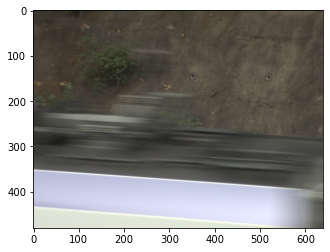

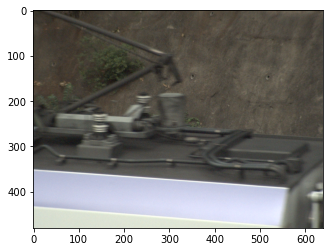

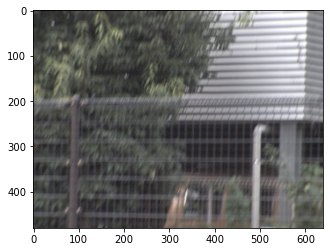

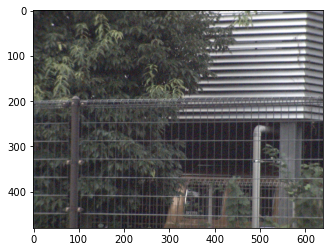

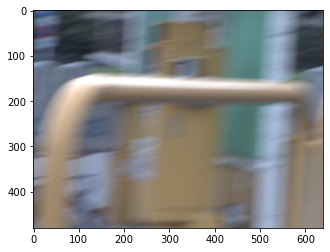

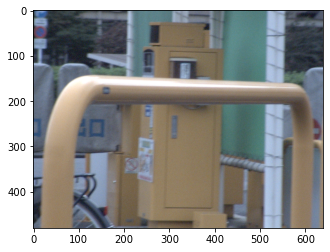

In [4]:
import os
from os.path import join, dirname
import cv2
import lmdb
import pickle
import matplotlib.pyplot as plt
import numpy as np
# test lmdb dataset
H,W,C = 480,640,3
dataset_name = 'rscd'
lmdb_path = join('/home/zhong/Dataset',dataset_name+'_lmdb')
# tarin set
env = lmdb.open(join(lmdb_path, '{}_train'.format(dataset_name)), map_size=1099511627776)
env_gt = lmdb.open(join(lmdb_path, '{}_train_gt'.format(dataset_name)), map_size=1099511627776)
txn = env.begin()
txn_gt = env_gt.begin()
seq = 49
frame = 49
key = '{:03d}_{:08d}'.format(seq, frame)
test = txn.get(key.encode())
test = np.frombuffer(test, dtype='uint8')
test = test.reshape(H,W,C)
test_gt = txn_gt.get(key.encode())
test_gt = np.frombuffer(test_gt, dtype='uint8')
test_gt = test_gt.reshape(H,W,C)
plt.imshow(test[:,:,::-1])
plt.figure()
plt.imshow(test_gt[:,:,::-1])
plt.show()
env.close()
env_gt.close()
# valid set
env = lmdb.open(join(lmdb_path, '{}_valid'.format(dataset_name)), map_size=1099511627776)
env_gt = lmdb.open(join(lmdb_path, '{}_valid_gt'.format(dataset_name)), map_size=1099511627776)
txn = env.begin()
txn_gt = env_gt.begin()
seq = 14
frame = 49
key = '{:03d}_{:08d}'.format(seq, frame)
test = txn.get(key.encode())
test = np.frombuffer(test, dtype='uint8')
test = test.reshape(H,W,C)
test_gt = txn_gt.get(key.encode())
test_gt = np.frombuffer(test_gt, dtype='uint8')
test_gt = test_gt.reshape(H,W,C)
plt.imshow(test[:,:,::-1])
plt.figure()
plt.imshow(test_gt[:,:,::-1])
plt.show()
env.close()
env_gt.close()
# test set
env = lmdb.open(join(lmdb_path, '{}_test'.format(dataset_name)), map_size=1099511627776)
env_gt = lmdb.open(join(lmdb_path, '{}_test_gt'.format(dataset_name)), map_size=1099511627776)
txn = env.begin()
txn_gt = env_gt.begin()
seq = 14
frame = 49
key = '{:03d}_{:08d}'.format(seq, frame)
test = txn.get(key.encode())
test = np.frombuffer(test, dtype='uint8')
test = test.reshape(H,W,C)
test_gt = txn_gt.get(key.encode())
test_gt = np.frombuffer(test_gt, dtype='uint8')
test_gt = test_gt.reshape(H,W,C)
plt.imshow(test[:,:,::-1])
plt.figure()
plt.imshow(test_gt[:,:,::-1])
plt.show()
env.close()
env_gt.close()